# Visual Q&A Demo

## Setup
1-Adds required packages to Julia.   
2-Downloads sample data and a pretrained model. 

In [2]:
include("demosetup.jl")

INFO: Downloading pre-trained model from our servers...
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 75.9M  100 75.9M    0     0  4389k      0  0:00:17  0:00:17 --:--:-- 4069k


"models/macnet.jld"

## Initialization
1-Loads the sample demo data (image features,questions,vocabulary).   
2-Loads the pretrained model.   

In [3]:
include("src/newmacnetwork.jl")
feats,qstsns,(w2i,a2i,i2w,i2a) = loadDemoData("data/demo/");
_,wrun,r,_,p = loadmodel("models/macnet.jld";onlywrun=true);
if !(typeof(first(wrun)) <: atype)
    wrun = map(atype,wrun);
end;

INFO: Loading demo features ...
INFO: Loading demo questions ...
INFO: Loading dictionaries ...


## Sample Data
1-Randomly selects (question,image) pair from the sample data   
2-Make predictions for the question and checks whether the prediction is correct   

In [4]:
rnd        = rand(1:length(qstsns))
inst       = qstsns[rnd]
feat       = feats[:,:,:,rnd:rnd]
question   = Array{Int}(inst[2])
answer     = inst[3];
family     = inst[4];
results,prediction = singlerun(wrun,r,feat,question;p=p);
answer==prediction

true

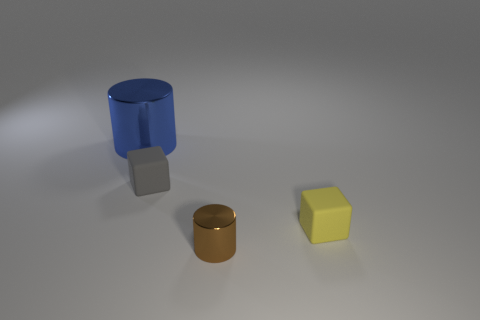

In [5]:
img = load("data/demo/CLEVR_v1.0/images/val/$(inst[1])")

In [6]:
textq  = i2w[question];
println("Question: ",join(textq," "))
texta  = i2a[answer];
println("Answer: $(texta)\nPrediction: $(i2a[prediction]) ")

Question: What number of other things are there of the same shape as the small gray matte object ?
Answer: 1
Prediction: 1 


## User Data
You can enter your own question about the image and test whether the prediction is correct

In [8]:
userinput = readline(STDIN)
words = split(userinput) # tokenize(userinput)
question = [get!(w2i,wr,1) for wr in words]
results,prediction = singlerun(wrun,r,feat,question;p=p);
println("Question: $(join(i2w[question]," "))")
println("Prediction: $(i2a[prediction])")

STDIN> what shape is the yellow object
Question: what shape is the yellow object
Prediction: cube


## Visualize
`visualize` function visualizes attention maps for each time step of the mac network

step_1 most attn. wrds: String["yellow", "the"]


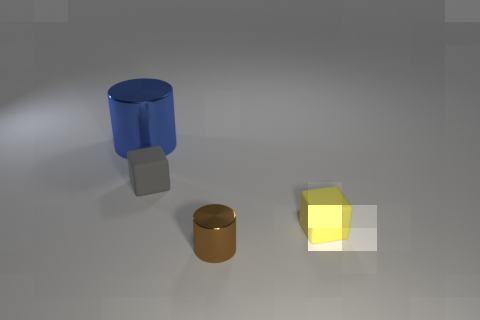

step_2 most attn. wrds: String["is", "object"]


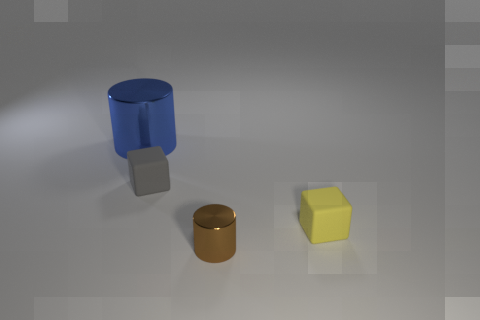

step_3 most attn. wrds: String["shape", "what"]


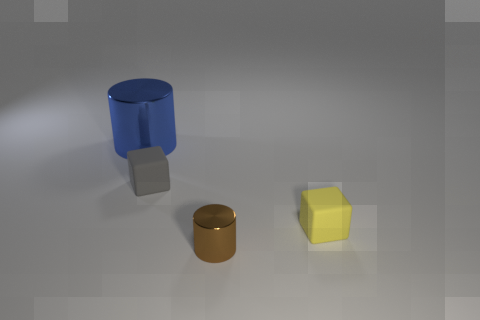

step_4 most attn. wrds: String["object", "shape"]


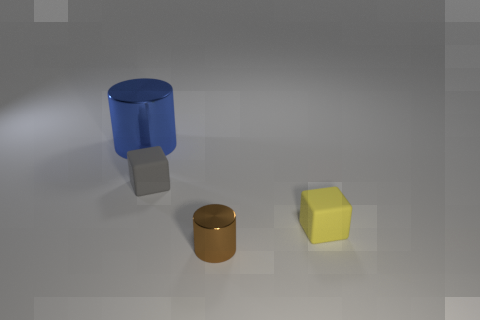

step_5 most attn. wrds: String["the", "yellow"]


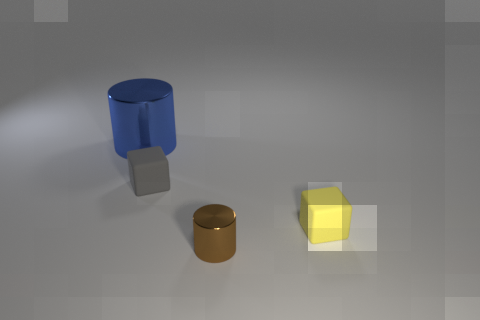

step_6 most attn. wrds: String["is", "the"]


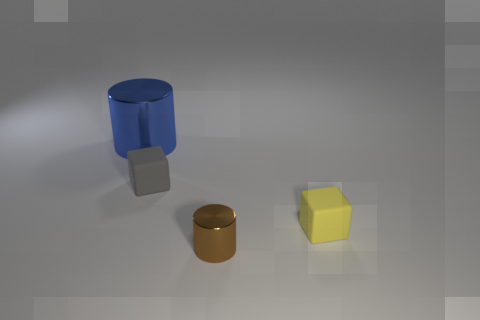

step_7 most attn. wrds: String["shape", "is"]


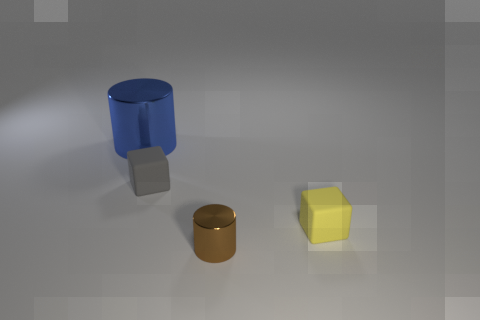

step_8 most attn. wrds: String["shape", "what"]


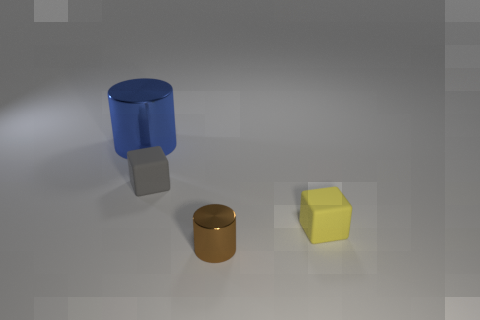

step_9 most attn. wrds: String["shape", "is"]


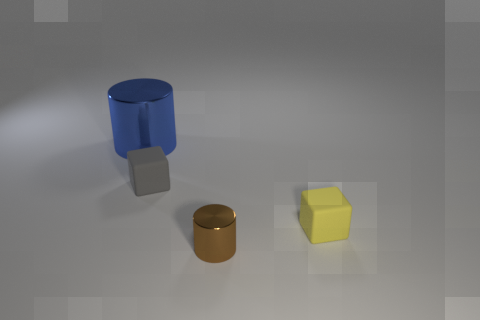

step_10 most attn. wrds: String["is", "what"]


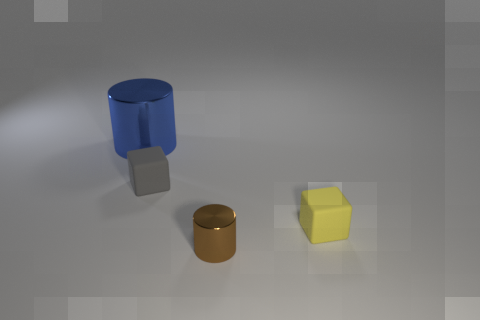

step_11 most attn. wrds: String["what", "is"]


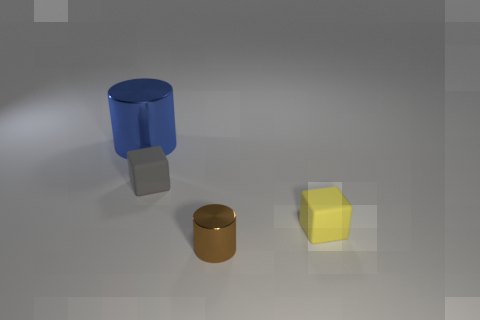

step_12 most attn. wrds: String["yellow", "object"]


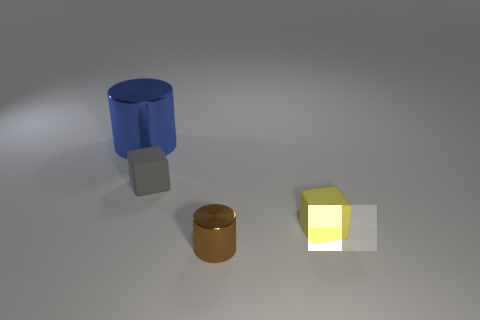

In [9]:
visualize(img,results;p=p)